# Seaborn - Tutorial !

NOTE : The datasets I'll be using in this tutorial are all available in the seaborn library itself so you won't need to download any from external sources.

#### Seaborn is a data visualisation library available in python. The ways in which you can visualise data are endless but that is not the only reason I recommend learning seaborn. Seaborn gives you more freedom than just drawing barplots, scatterplots, histograms etc. It not only makes information more comprehensive through the visualisation generated but also makes it easier to generate those spectacular visualisations with only single lines of code which traditionally would wither have been impossible to do or would have taken multiple complex lines of code !

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1. relplot - For continuous data 

'relplot' in seaborn is a function used to generate scatterplots(default) or line-plots. Relplots has various parameters which make it easier to visualise data in more than two dimensions (for ecxample : by changing color/style of the third or even fourth dimension).

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


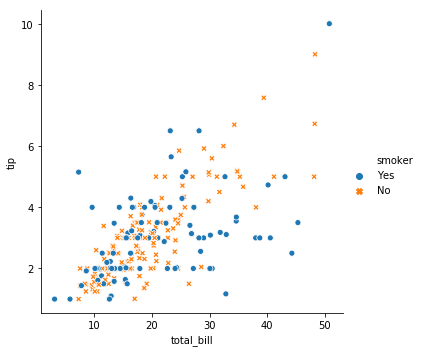

In [4]:
sns.relplot('total_bill','tip',hue='smoker',style='smoker',data=tips)
plt.show()

# hue adds another dimension with color in a 2D graph
# style makes it easier to differentiate between two scatterplotted dimensions

# If running this gives you an error that seaborn has no attribute relplot it's because your seaborn is not updated
# Update seaborn to version 0.9.0 with the command - pip3 install seaborn==0.9.0
# Restart your kernel after installing seaborn 0.9.0

In the above visualisation, I converted a 2D graph to a 3D visualisation by changing color of dimension 'Smoker'

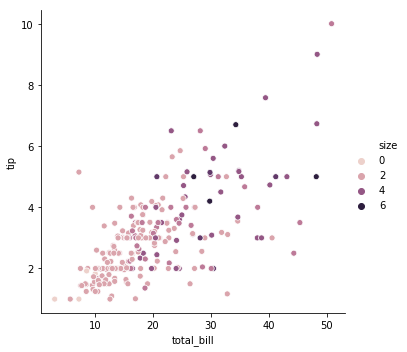

In [5]:
# hue can work on discrete numerical data as well
sns.relplot('total_bill','tip', hue='size', data=tips)
plt.show()

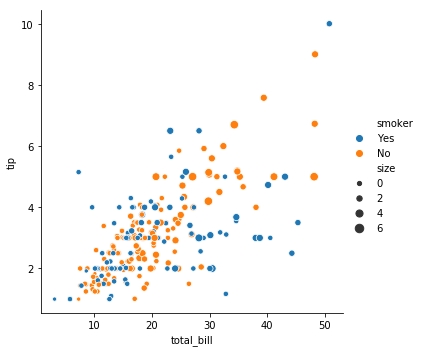

In [6]:
#size attribute
sns.relplot('total_bill','tip', hue='smoker',size='size', data=tips)
plt.show()

As I said above lineplot and scatterplot are the two things relplot can draw. All you have to do is change kind attribute to line (by default it is scatter).

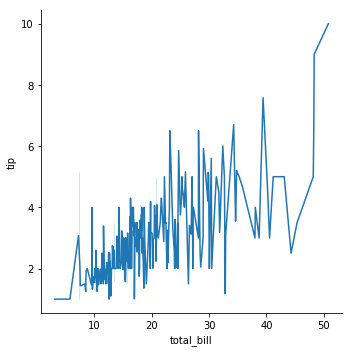

In [7]:
sns.relplot('total_bill','tip', kind='line', data=tips)
plt.show()

In [8]:
fmri = sns.load_dataset("fmri")

In [9]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


Now this dataset specifically has multiple values of y for single value for x. Sns in this case is smart. It takes the aggregate of all values (called estimator in seaborn) of x at certain point, plots it's mean and shades area around it which represents 95% confidence interval for that specific point x !

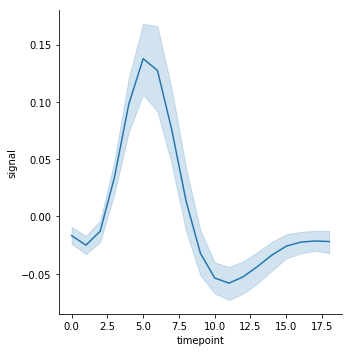

In [10]:
sns.relplot('timepoint','signal',kind='line',data=fmri)
plt.show()

Confidence intervals are computed using bootstrapping which for larger visualisation can be pain onthe cpu or gpu. Dissable it by turning attribute ci = None

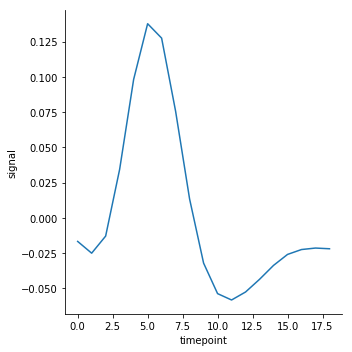

In [11]:
sns.relplot('timepoint','signal',kind='line',data=fmri, ci = None)
plt.show()

##### ci = 'sd' for Standard deviation instead of confidence interval

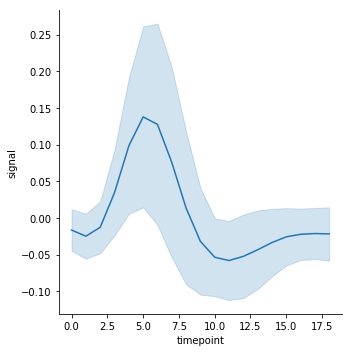

In [12]:
sns.relplot('timepoint','signal',kind='line',data=fmri, ci = 'sd')
plt.show()

Hue works like a charm as in scatterplot

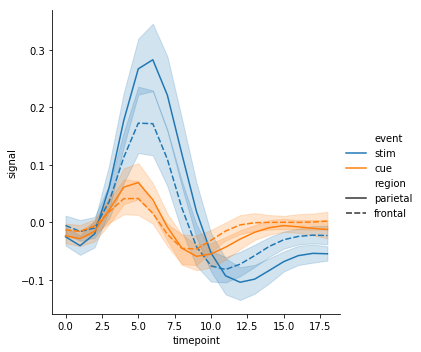

In [13]:
# adding another dimension 'region' by style parameter
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", style='region', data=fmri);
plt.show()

In [14]:
dots = sns.load_dataset('dots').query('align=="dots"') #.query returns only those rows satisfyinf expressions
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


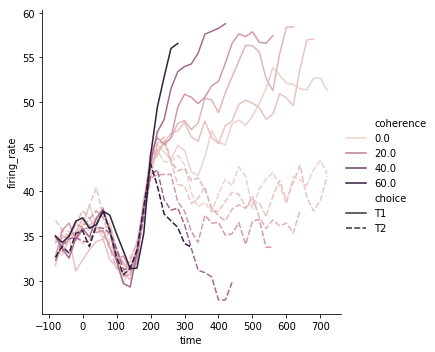

In [15]:
sns.relplot(x="time", y="firing_rate", hue="coherence", style="choice", kind="line", data=dots);
plt.show()

There is nothing new in terms of showing to you guys or even to myself in the above example but damn it looks beautiful. 

NOTE : You can visualise dates column as well in similar fashion as long as the column is in correct format !

#### It becomes difficult sometimes to visualise multiple dimensions in single graph and interpret them as well ! So one alternative that seaborn provides is to generate rows and columns of mulriple graphs to represent two more dimensions !

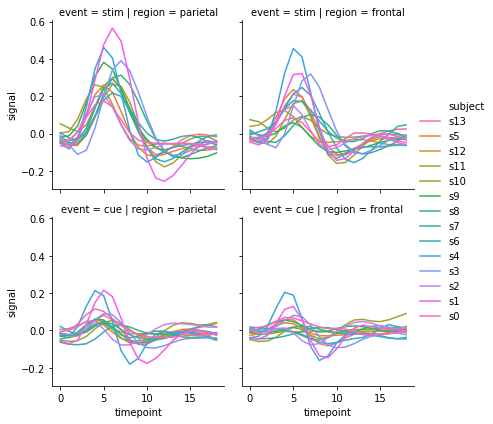

In [16]:
# change attribute height and aspect to change dimension of output !
sns.relplot(x="timepoint", y="signal", hue="subject", col="region", row="event",height=3, aspect = 1,
            kind="line", estimator=None, data=fmri);
plt.show()

## 2. Categorical Visualisation

### 2.1 Categorical Scatterplots

In [17]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


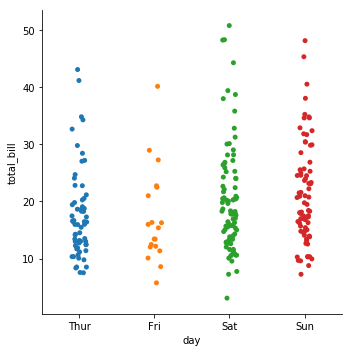

In [18]:
# catplot shows a bit of jitter in categorical scatterplot depending upon data variation
# jitter can be removed by turning that attribute off
sns.catplot(x="day", y="total_bill", data=tips)
plt.show()

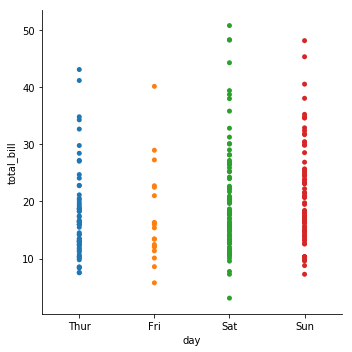

In [19]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);
plt.show()

There is still an overlap of points which can be avoided by changing the kind from strip(default) to swarm

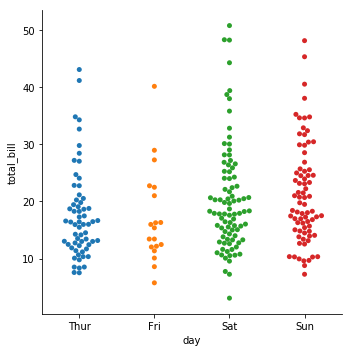

In [20]:
sns.catplot(x="day", y="total_bill", kind='swarm', data=tips);
plt.show()

#### The order parameter !

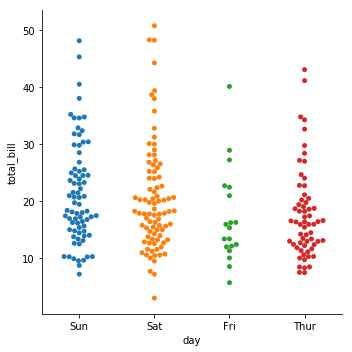

In [21]:
sns.catplot(x="day", y="total_bill", kind='swarm', order=['Sun','Sat','Fri','Thur'], data=tips);
plt.show()

### 2.2 Categorical distribution plot 

The scatterplots are suited only for visualisations dealing with small data. Large datasets are difficult to be interpret using scatterplots. These can be dealt with by other methods as can be seen below :

#### Boxplots

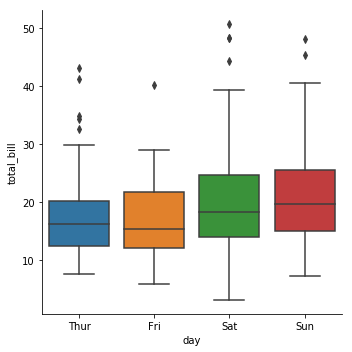

In [22]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);
plt.show()

There are three parts in the box plot

This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

Quartiles : points in data which represent the 25%, 50% and 75% mark of entire data !
IQR = Quartile 3 - Quartile 1.
So whiskers are the points that lie in the range : (Quartile1 - (1.5*IQR)) to Quartile1 or Quartile3 to (Quartile3 + (1.5*IQR))
Anything beyond that are treated as outliers and are represented by dots in graph as seen above because of IQR rule(Interquartile range rule).

#### BoxenPlot

Boxen Plots are typically the extension of boxplots that help to visualise the distribution better !

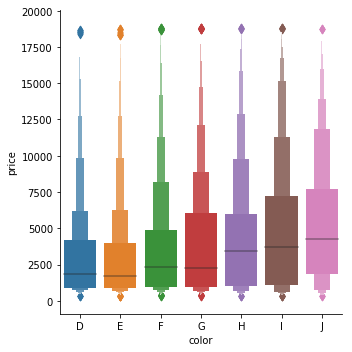

In [23]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen", data=diamonds.sort_values("color"));
plt.show()

#### ViolinPlot

Violin plots represent distribution in a better way as compared toboxplots since they perform kernel density estimation procedure

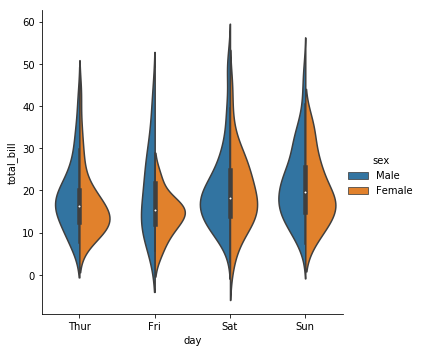

In [24]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, data=tips);
plt.show()

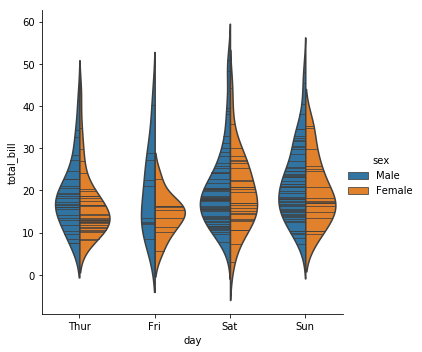

In [25]:
# attribute inner lets you visualise the datapoints instead of seeing an overall collected distribution
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", inner="stick", split=True, data=tips);
plt.show()
#the lines below represent data points

### 2.3 Categorical estimate plots

#### Barplots

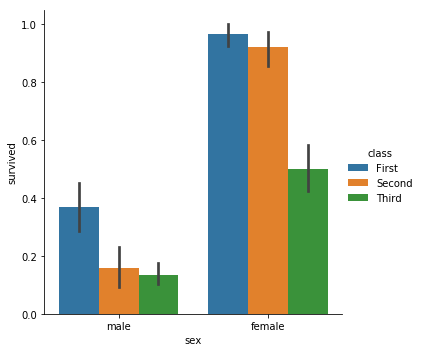

In [26]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)
plt.show()

The black bars represent confidence intervals around estimates ! These are known as error bars

#### CountPlots

Count plots Must have either x or y as not declared !

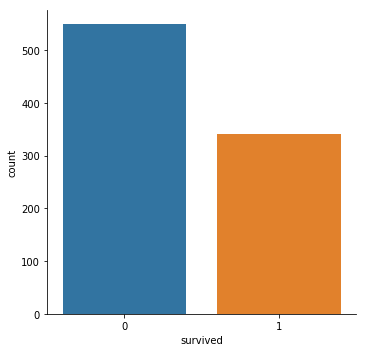

In [27]:
titanic = sns.load_dataset("titanic")
sns.catplot("survived", kind="count", data=titanic)
plt.show()

#### Point plots

They pretty much represent the same thing as barplots but instead of bars, they use points and draw a comparison !

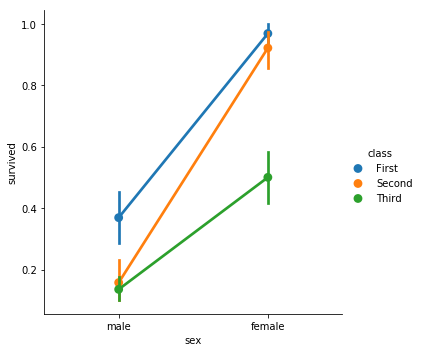

In [28]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)
plt.show()

## 3. Distribution Plot

A distribution plot is often an indication about various statistical observations which can be made like type of distribution (eg. : normal, binary etc.), skewness, variation in data, probability density etc. This type of information can prove to be very insightful while developing a Machine Learning based model !

In [29]:
import numpy as np

In [30]:
x = np.random.normal(size=100)

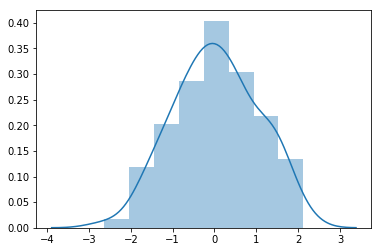

In [31]:
sns.distplot(x)
plt.show()

The histograms shouldn't be something that I feel like I need to explain to you guys. The blue line however represents Kernel Density Estimate - something used to estimate the probability density function of a sample.

You can remove the KDE(Kernel Density Estimate line) by turning off the attribute and replace it with something like the rugplot.

Rugplots are histograms having ticks on the x axis as the number of observations at that point ! Example explains it better and is given below : 

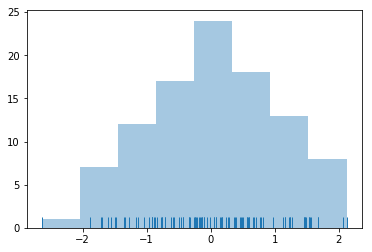

In [32]:
sns.distplot(x, kde=False, rug=True)
plt.show()

Changing the number of histogram bars is easy and can be done by bins attribute in distplot !

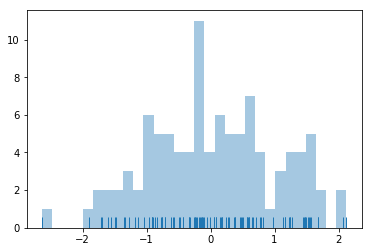

In [36]:
sns.distplot(x, kde=False, rug=True, bins=30)
plt.show()

You can also turn off histogram to see only the KDE

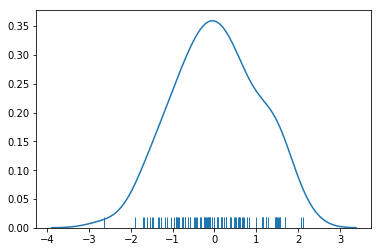

In [39]:
sns.distplot(x, hist=False, rug=True, bins=30)
plt.show()

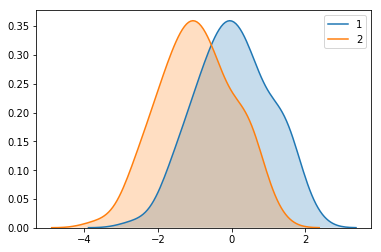

In [45]:
sns.kdeplot(x,shade=True,label='1')
sns.kdeplot(x-1,shade=True,label='2')
plt.legend()
plt.show()

#### You can have both scatterplots and distribution plots in the same graph by jointplot function

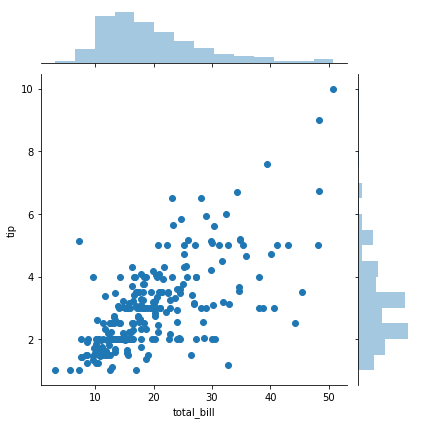

In [46]:
sns.jointplot('total_bill','tip',data=tips)
plt.show()

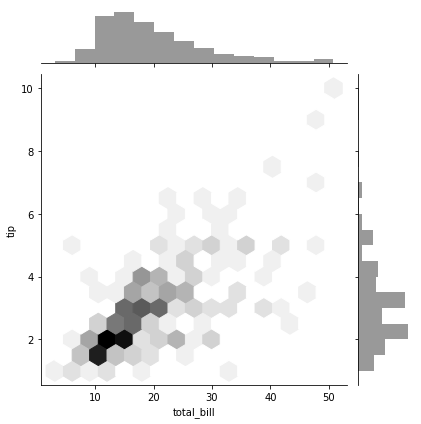

In [49]:
sns.jointplot('total_bill','tip',kind='hex',data=tips,color='black')
plt.show()
#Hexbin plots are basically a type of scatterplot in which the data is represented in form of bins instead of points

In [50]:
#KDE plots work in similar fashion

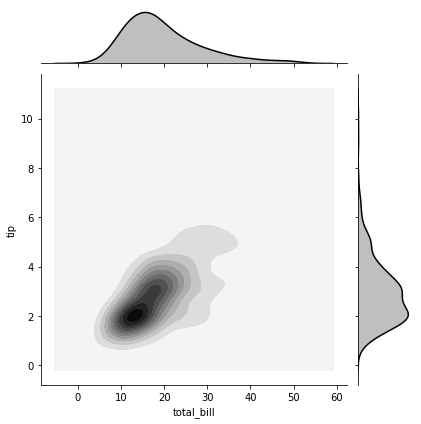

In [51]:
sns.jointplot('total_bill','tip',kind='kde',data=tips,color='black')
plt.show()

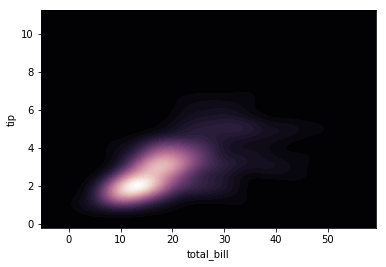

In [60]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(tips.total_bill,tips.tip,cmap=cmap,n_levels=50,shade=True)
plt.show()

## 4. Finding relationship between features using distribution plot

In [62]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

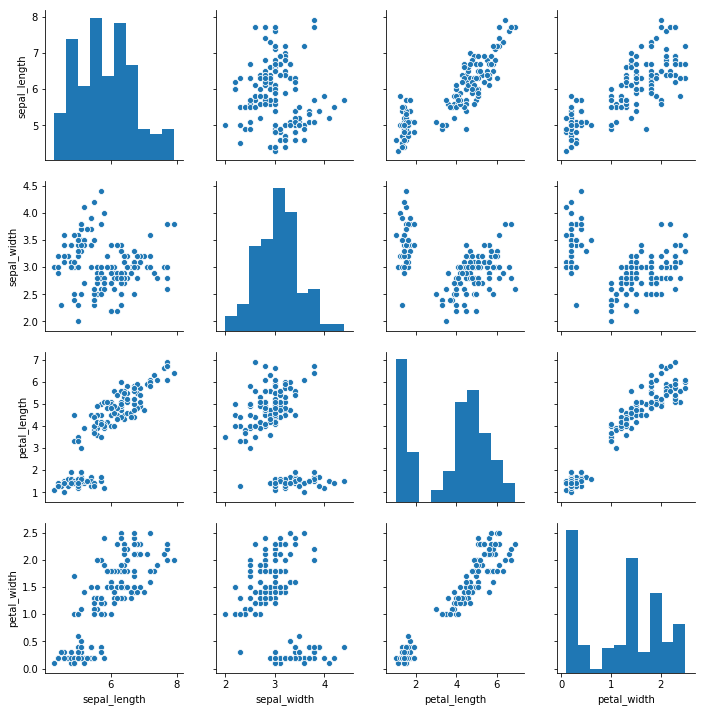

In [63]:
plt.show()

There seems to be a linear relationship between petal length and width and for very understandable reasons

You can also choose only a few columns instead of going all in

In [67]:
iris = sns.load_dataset("iris")
sns.pairplot(iris[['petal_length','petal_width']]);

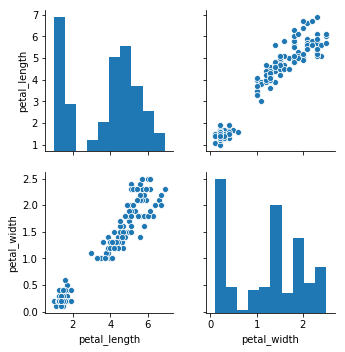

In [68]:
plt.show()

## 5. Linear Relationships

### 5.1 RegressionPlot

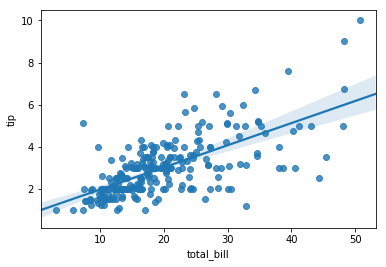

In [71]:
sns.regplot(x="total_bill", y="tip", data=tips);
plt.show()

The shaded part shows 95% confidence interval for the regression line generated

You can use lmplot instead of regplot if you intend to be using a facetgrid (facetgrid is a grid with rows and columns representind some dimension)

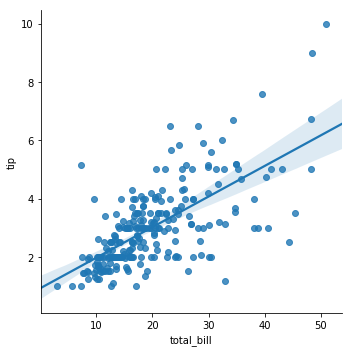

In [72]:
sns.lmplot(x="total_bill", y="tip", data=tips);
plt.show()

### The anscombe dataset

In [73]:
anscombe = sns.load_dataset("anscombe")

Anscombe dataset contains various datasets inside it regarding various ways your data in a scatterplot might be present.

Example : 

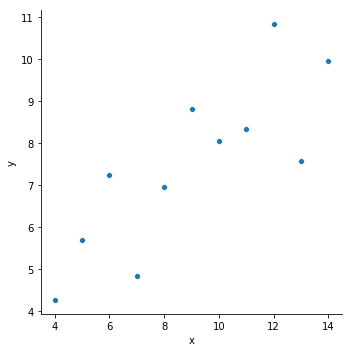

In [76]:
sns.relplot(x='x',y='y',data=anscombe.query("dataset=='I'"))
plt.show()

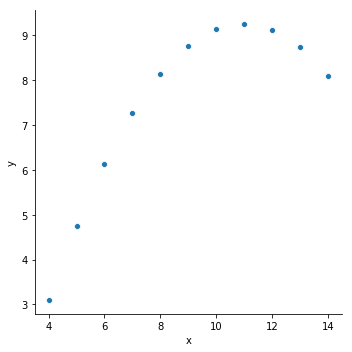

In [77]:
sns.relplot(x='x',y='y',data=anscombe.query("dataset=='II'"))
plt.show()

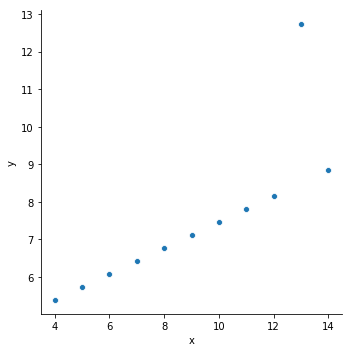

In [78]:
sns.relplot(x='x',y='y',data=anscombe.query("dataset=='III'"))
plt.show()

Now plotting regression model in all of these will give the following results :

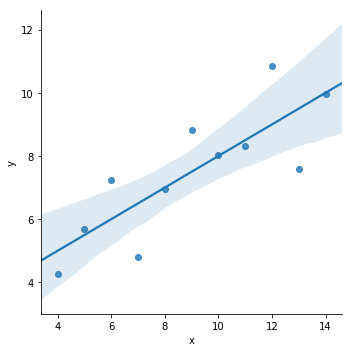

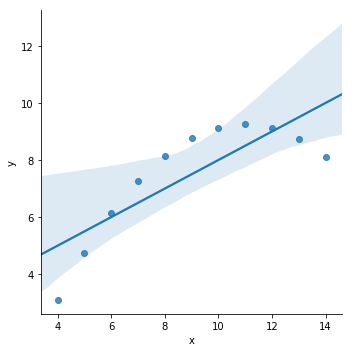

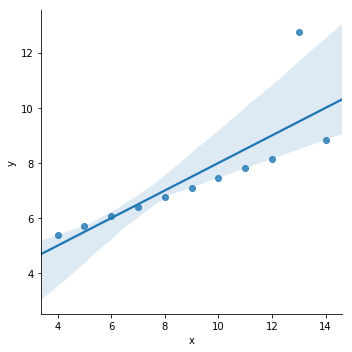

In [80]:
sns.lmplot(x='x',y='y',data=anscombe.query("dataset=='I'"));
sns.lmplot(x='x',y='y',data=anscombe.query("dataset=='II'"));
sns.lmplot(x='x',y='y',data=anscombe.query("dataset=='III'"));
plt.show()

I don't know about you but these to me except for Dataset I appear absolutely and just plain bad !

In the second datset, our regression line should have predicted a curve.
In our thrid dataset, our regression line should not have been affected by the potential outlier we can see !

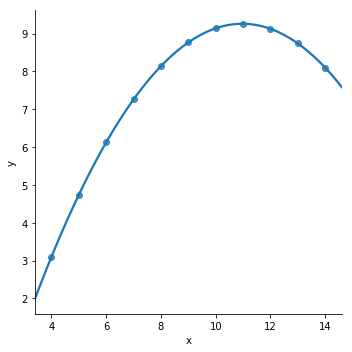

In [86]:
#Dataset ii
sns.lmplot(x='x',y='y',data=anscombe.query("dataset=='II'"),order=2);
plt.show()

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/robust/robust_linear_model.py:284: RuntimeWarning: divide by zero encountered in true_divide
  self.weights = self.M.weights(wls_results.resid/self.scale)
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/robust/robust_linear_model.py:284: RuntimeWarning: invalid value encountered in true_divide
  self.weights = self.M.weights(wls_results.resid/self.scale)
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/robust/norms.py:190: RuntimeWarning: invalid value encountered in less_equal
  return np.less_equal(np.fabs(z), self.t)
/Applications/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1574: RuntimeWarning: invalid value encountered in greater
  return (S > tol).sum(axis=-1)
/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/Applications/anaconda3/lib/python3.6/site-packages/

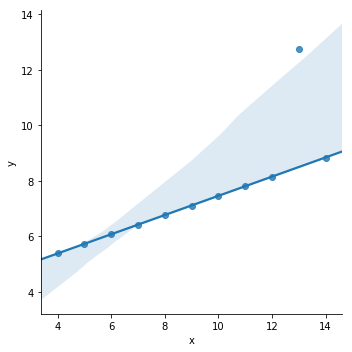

In [87]:
#Dataset iii
sns.lmplot(x='x',y='y',data=anscombe.query("dataset=='III'"), robust=True);
plt.show()

If it is a categorical classification problem for binary or similar variables, using logistic regression is more helpful. You can do that easily by changing the logistic=True attribute in lmplot


In [90]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset=='II'"),lowess=True);

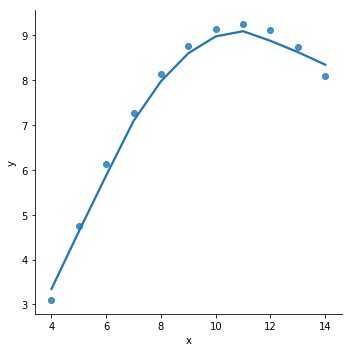

In [91]:
plt.show()

The above demostrates moving regression turned on by attribute lowess=True, you can read more about it here - https://en.wikipedia.org/wiki/Local_regression

#### Regression in more than 2Dimensions

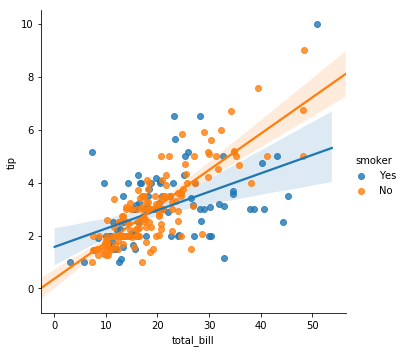

In [93]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)
plt.show()

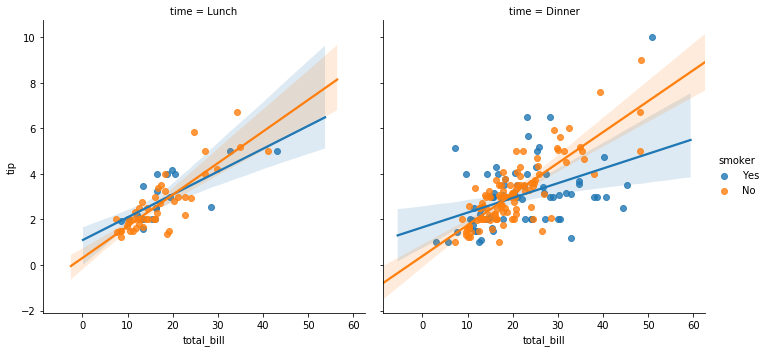

In [94]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)
plt.show()